### PERFORMING THE SIMPLE LINEAR REGRESSION PROJECT USING ORDINARY LEAST SQUARES METHOD USING 
### SALARY DATASET

In [35]:
#### STEP 1 : IMPORT NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [36]:
#### STEP 2 : LOADING THE DATASET
df = pd.read_csv("Salary_Data.csv")
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [37]:
#### STEP 3 : SLICING THE FEATURES AND TARGET COLUMN
X = df['YearsExperience'].values
y = df['Salary'].values

X = X.reshape(-1, 1)

In [38]:
print(X.shape)
print(y.shape)

(30, 1)
(30,)


In [39]:
#### STEP 4 : ADDING THE CONSTANT TO THE MODEL
X_with_intercept = sm.add_constant(X)
X_with_intercept

array([[ 1. ,  1.1],
       [ 1. ,  1.3],
       [ 1. ,  1.5],
       [ 1. ,  2. ],
       [ 1. ,  2.2],
       [ 1. ,  2.9],
       [ 1. ,  3. ],
       [ 1. ,  3.2],
       [ 1. ,  3.2],
       [ 1. ,  3.7],
       [ 1. ,  3.9],
       [ 1. ,  4. ],
       [ 1. ,  4. ],
       [ 1. ,  4.1],
       [ 1. ,  4.5],
       [ 1. ,  4.9],
       [ 1. ,  5.1],
       [ 1. ,  5.3],
       [ 1. ,  5.9],
       [ 1. ,  6. ],
       [ 1. ,  6.8],
       [ 1. ,  7.1],
       [ 1. ,  7.9],
       [ 1. ,  8.2],
       [ 1. ,  8.7],
       [ 1. ,  9. ],
       [ 1. ,  9.5],
       [ 1. ,  9.6],
       [ 1. , 10.3],
       [ 1. , 10.5]])

In [40]:
#### STEP 5 : FITTING THE MODEL USING OLS 
model = sm.OLS(y, X_with_intercept)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           1.14e-20
Time:                        23:08:22   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.0

#### The model explains 95.7% of the variance in the target variable, indicating a strong fit. The coefficients are 
#### statistically significant, and the residuals appear normally distributed, making the model a good predictor.

In [41]:
#### STEP 6 : EXTRACTING THE ESTIMATORS
beta_0 = results.params[0]  # Intercept
beta_1 = results.params[1]  # Slope
print("Bias estimator:", beta_0)
print("Regression Coefficient estimator:", beta_1)

Bias estimator: 25792.200198668685
Regression Coefficient estimator: 9449.96232145508


In [42]:
#### STEP 7 : MODEL PREDICTION
y_pred = results.predict(X_with_intercept)
y_pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

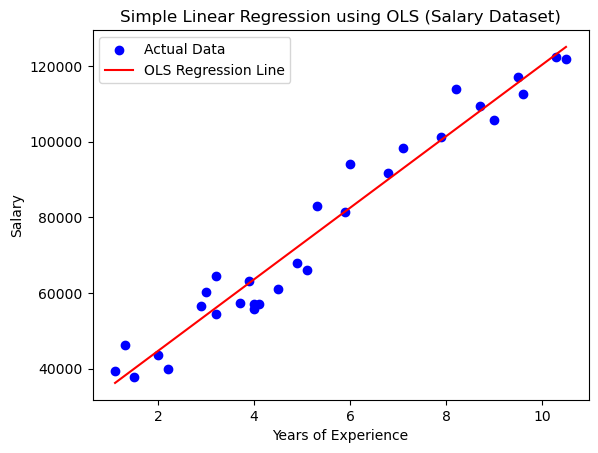

In [43]:
#### STEP 8 : PLOTTING THE DATA AND REGRESSION LINE
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='OLS Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Simple Linear Regression using OLS (Salary Dataset)')
plt.legend()
plt.show()

In [44]:
#### STEP 9 : EXTRACTING THE STANDARD ERRORS
std_err = results.bse
std_err_intercept = std_err[0]  # Standard error for intercept
std_err_slope = std_err[1] # Standard error for regression coefficient
print("Standard Error for intercept:", std_err_intercept)
print("Standard Error for slope:", std_err_slope)

Standard Error for intercept: 2273.0534325816043
Standard Error for slope: 378.7545742388211


In [45]:
#### STEP 10 : ESTIMATING THE ERROR VARIANCE
rss = np.sum(results.resid**2)
sigma_squared_hat = rss / results.df_resid
print("Estimated Error variance:", sigma_squared_hat)

Estimated Error variance: 33504591.131015327


In [46]:
#### STEP 11 : COMPUTING THE CONFIDENCE INTERVALS OF BIAS AND REGRESSION COEFFICEINT RESPECTIVELY EACH WITH CONFIDENCE COEFFICIENT OF 95%
confidence_intervals = results.conf_int(alpha=0.05)
print("Confidence Intervals of bias:", confidence_intervals[0])
print("Confidence Intervls of regression coefficient:", confidence_intervals[1])

Confidence Intervals of bias: [21136.06131369 30448.33908365]
Confidence Intervls of regression coefficient: [ 8674.1187466  10225.80589631]
